In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let e(t),s(t),p(t),es(t), be the concentration of the enzyme E, the substrate S,the product P, and the complex with S at time t,then
the equations for the rate of changes of the four species, E, S, ES, and P are:
de/dt  = -k1*e*s+(K2+K3)*es
ds/dt =-k1*e*s+600*es
des/dt=k1*e*s-(k2+k3)*es
dp/dt=k3*es

In [2]:
def euler(x,f,h):
    m1=h*f(x)
    m2=h*f(x+0.5*m1)
    m3=h*f(x+0.5*m2)
    m4=h*f(x+m3)
    return x+(1/6)*(m1+2*m2+2*m3+m4)


def dX_dt(var):
    e,s,es,p=var[0],var[1],var[2],var[3]
    return np.array([-k1*e*s+(k2+k3)*es,-k1*e*s+k2*es,k1*e*s-(k2+k3)*es,k3*es])

[9.99541673e-01 3.35642643e-03 4.58326991e-04 9.99618525e+00]


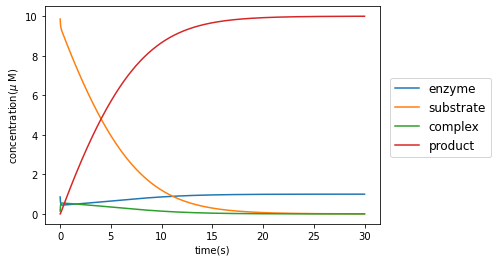

In [9]:
k1,k2,k3=100/60,600/60,150/60
var=[1,10,0,0]
t=0
h=0.01
E_VAL=[]
S_VAL=[]
ES_VAL=[]
P_VAL=[]
T_VAL=[]
V=[]

while t<30:
    var=euler(var,dX_dt,h)
    E_VAL.append(var[0])
    S_VAL.append(var[1])
    ES_VAL.append(var[2])
    P_VAL.append(var[3])
    V.append(k3*var[2])
    t+=h
    T_VAL.append(t)
print(var)

plt.plot(T_VAL,E_VAL,label="enzyme")
plt.plot(T_VAL,S_VAL,label="substrate")
plt.plot(T_VAL,ES_VAL,label="complex")
plt.plot(T_VAL,P_VAL,label="product")
plt.xlabel("time(s)")
plt.ylabel("concentration($\mu$ M)")
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.7),fontsize=12)

Text(0, 0.5, 'concentration of S')

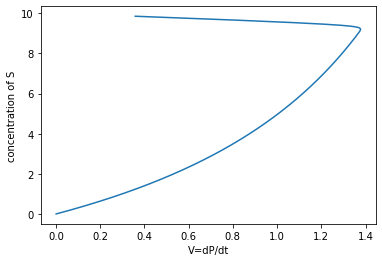

In [11]:
plt.plot(V,S_VAL)
plt.xlabel("V=dP/dt")
plt.ylabel("concentration of S")
# plt.xticks(list(np.arange(0,1.5,0.1)))
# plt.yticks(list(np.arange(6,10,0.5)))

From the plot, it can be seen that the Vm is approximately equal to 1.4 $\mu$ M/s , when S=9$\mu$M and when S>9 $\mu$M, V will be less that 1.4 $\mu$M/s